In [2]:
#%run -i '../scripts/utility_readblt.py' 'mumu'

In [2]:
from utility_common import *
from utility_plotter import *
from utility_templatefitter import *

from IPython.display import clear_output

## add plotting option and load plotting parameter table
%matplotlib inline
#%qtconsole --style monokai
plt.style.use('classic')
plt.rc("figure",facecolor="w",figsize=(6,4))
plt.rc("font",size=10)
plt.rc("savefig",dpi=300)

# 1. Read data and MC as dataframe

In [3]:
selection  = "emu"
nbjetcut   =  "==1"

pickledir  =  "/Users/zihengchen/Documents/Analysis/workplace/data/pickle/{}/".format(selection)

cuts = GetSelectionCut(selection) + "& (nBJets{})".format(nbjetcut)

Data = LoadDataframe(pickledir + "data2016").query(cuts)
MCzz = LoadDataframe(pickledir + "mcdiboson").query(cuts)
MCdy = LoadDataframe(pickledir + "mcdy").query(cuts)
MCt  = LoadDataframe(pickledir + "mct").query(cuts)
MCtt = LoadDataframe(pickledir + "mctt").query(cuts)

#MCsg = pd.concat([MCt,MCtt],ignore_index=True)

df_list    = [MCzz,MCdy,MCt,MCtt,Data]

# 2. Fitting

In [4]:
v,a,b,step,xl = "lepton2_pt",0,200,5,"lepton2_pt[GeV]"
tfit = TemplateFitter_Hist(v,a,b,step,df_list,
                           lock=np.array([1,0,1,0]))

Failed for boundaries, negetive sigma^2 exist in observed inv-hessian 
total cost is 4361.088234
adjust 0 is  1.030 +/-  0.000
adjust 1 is  0.000 +/-  0.000
adjust 2 is  1.053 +/-  0.000
adjust 3 is  1.610 +/-  0.000


# 3. Plot Fitting Results

In [5]:
label_list = ['Diboson','V+Jets', 'tW',"tt",'data']
color_list = ["#a32020","#eb8c00","#49feec","deepskyblue","k"]
plotoutdir = GetPlotDir(selection, nbjetcut)
print(plotoutdir)

/Users/zihengchen/Documents/Analysis/workplace/plot/emu/binned_nBJets/1b/


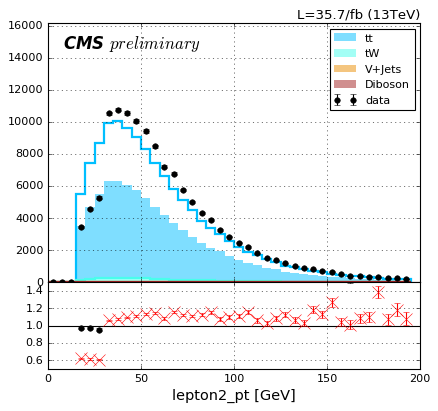

In [6]:
tfit.settingPlot("lepton2_pt [GeV]",label_list,color_list )
tfit.plotFittingResult()